<a href="https://colab.research.google.com/github/ntkl06/khanhlinh06.github.io/blob/main/buoi06_250923_ex23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd
# Or load titanic data that are alraedy split into train and test data sets according to https://www.kaggle.com/c/titanic/data
# But the test data of kaggle does not have labels
# Therefore we will load  the whole data from a data repository then split it latter
titanic_data = pd.read_csv("https://www.openml.org/data/get_csv/16826755/phpMYEkMl.csv", na_values=['?']) #yo
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Let's drop some features that we will not consider here.
titanic_data.drop(['name','ticket', 'embarked', 'boat' ,'body' ,'home.dest'], axis=1, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

y=titanic_data['survived']
X=titanic_data.drop(['survived'], axis=1)

# Identify categorical columns for one-hot encoding
categorical_features = ['sex', 'cabin']
numerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare']


# Create a ColumnTransformer to apply one-hot encoding and imputation
# The 'remainder="passthrough"' keeps the other columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to the data
X_encoded = preprocessor.fit_transform(X)

X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [6]:
#Now if we perform classification it might not work for most classifiers
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
#classifier=SVC()
classifier.fit(X_titanic_train, y_titanic_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# We need the upgraded sklearn to accept the parameters for encoders
import sklearn
!pip install -U scikit-learn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.7.2.


In [10]:
# As the data has no strings/object snow, let's try performing classification using the encoded data
classifier.fit(X_titanic_train_encoded, y_titanic_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [15]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [16]:
# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
classification = wine['target']

# Gather all of this information into a DataFrame
wineDF = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# add the "target" classifications as a new column
wineDF['classification'] = classification

# drop a bunch of boring columns

df = wineDF[['total_phenols', 'color_intensity', 'od280/od315_of_diluted_wines', 'classification']]
# Print the first 5 rows of the data, eq. to data[:5]
df.head()

,total_phenols,color_intensity,od280/od315_of_diluted_wines,classification
0,2.80,5.64,3.92,0
1,2.65,4.38,3.40,0
2,2.80,5.68,3.17,0
3,3.85,7.80,3.45,0
4,2.80,4.32,2.93,0


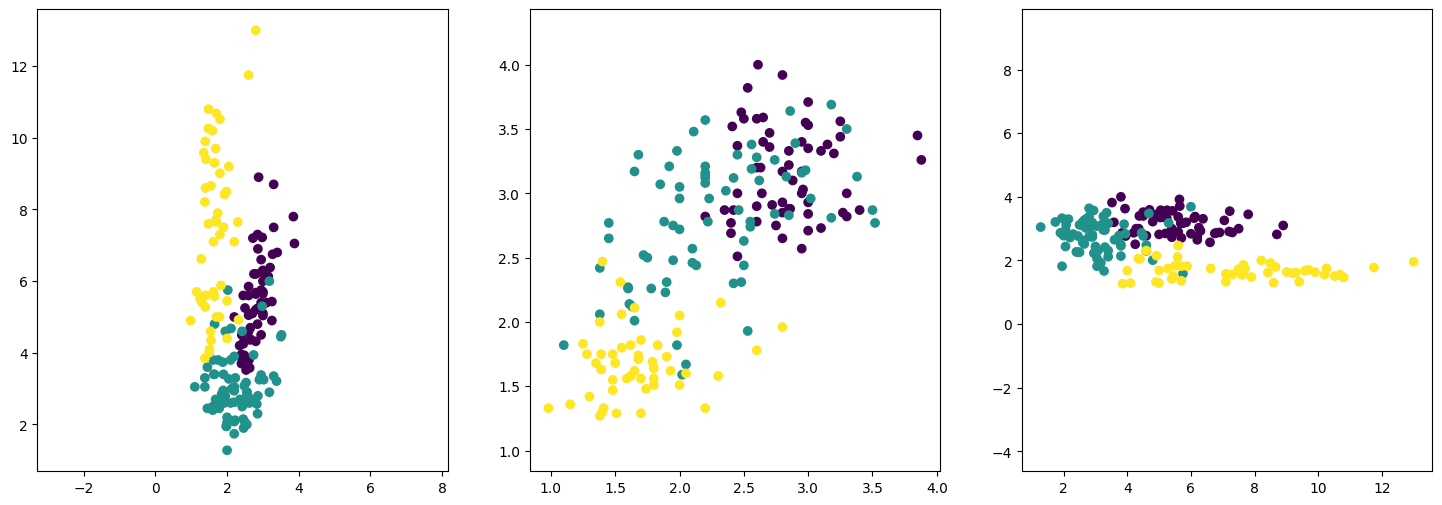

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
axs[0].scatter(wineDF['total_phenols'], wineDF['color_intensity'], c=wineDF['classification'])
axs[0].axis('equal')
axs[1].scatter(wineDF['total_phenols'], wineDF['od280/od315_of_diluted_wines'], c=wineDF['classification'])
axs[1].axis('equal')
axs[2].scatter(wineDF['color_intensity'], wineDF['od280/od315_of_diluted_wines'], c=wineDF['classification'])
axs[2].axis('equal')
plt.show()

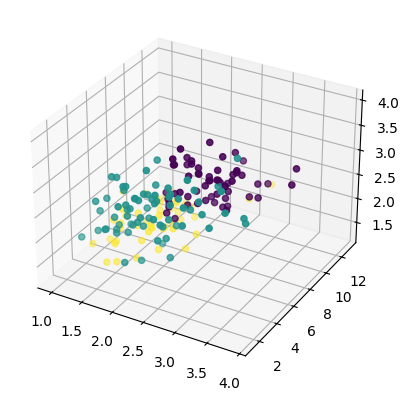

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = 15 * np.random.random(200)
xdata = np.sin(zdata) + 0.1 * np.random.randn(200)
ydata = np.cos(zdata) + 0.1 * np.random.randn(200)
ax.scatter3D(wineDF['total_phenols'], wineDF['color_intensity'], wineDF['od280/od315_of_diluted_wines'], c=wineDF['classification']);
plt.show()

In [19]:
import plotly.express as px
fig = px.scatter_3d(wineDF, x='total_phenols', y='color_intensity', z='od280/od315_of_diluted_wines',  color='classification')
fig.show()

In [20]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()